In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# from celluloid import Camera
from matplotlib import animation
import math
# from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting as nds

In [ ]:
# !pip install ffmpeg
# !pip install pymoo
# !pip install celluloid

## Fetch the file containing the final erros and complexities

In [5]:
df = pd.read_csv("output.txt", sep=",", header=None)
(num_rows, num_cols) = df.shape
pf_size = int(num_rows/2)
df_train = df.iloc[0:pf_size, :]
df_test = df.iloc[pf_size:, :]

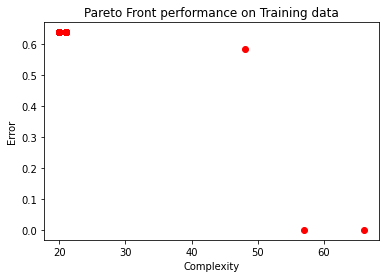

In [6]:
# training results on pf
train_error = df_train.iloc[:, 0]
train_complexity = df_train.iloc[:, 1]
plt.figure()
plt.scatter(train_complexity, train_error, color="red")
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title("Pareto Front performance on Training data")
plt.show()

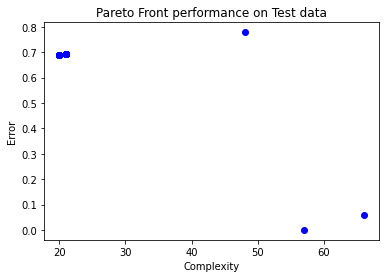

In [7]:
# test results on pf
test_error = df_test.iloc[:, 0]
test_complexity = df_test.iloc[:, 1]
plt.figure()
plt.scatter(test_complexity, test_error, color="blue")
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title("Pareto Front performance on Test data")
plt.show()

## Pareto Front simulation

In [70]:
f1 = np.zeros((num_rows, pop_size))
f2 = np.zeros((num_rows, pop_size))

for i in range(num_rows):
    for j in range(num_cols):
        if(j%2 == 0):
            f1[i, int(j/2)] = df.iloc[i, j]
        else:
            f2[i, int(j/2)] = df.iloc[i, j]

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
camera = Camera(fig)

for i in range(num_rows):
    F = np.column_stack([f1[i, :], f2[i, :]])
    axes.scatter(F[:, 0], F[:, 1], c='r')
    title = axes.text(0.5, 0.85, "", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5}, transform = axes.transAxes, ha='center')
    axes.set_xlabel('Complexity')
    axes.set_ylabel('Error')
    title.set_text(f"N_gen: {i}")
    camera.snap()

writervideo = animation.FFMpegWriter(fps=5)
anim = camera.animate(blit=True)
anim.save('Pareto Front Animation.mp4', writer=writervideo)

## Checking with pymoo

In [ ]:
orig_F = np.float64(df.iloc[:18, :].values)
orig_F

In [103]:
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting as nds

I = nds().do(orig_F)

In [ ]:
from pymoo.algorithms.moo.nsga2 import calc_crowding_distance

crowding = calc_crowding_distance(orig_F)
print(crowding)
I = np.argsort(-crowding)
I

In [ ]:
pf_F

In [ ]:
crowding

In [ ]:
np.max(f1)